<a href="https://colab.research.google.com/github/eduardofrancajr/PI4-analise_de_sentimentos/blob/main/script_pre_processamento_PI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy
spacy.__version__

'3.8.7'

In [ ]:
!python -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 10.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
pln = spacy.load('pt_core_news_sm')
pln

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

#caminho = open('/content/drive/MyDrive/Colab_Notebooks/PLN/CriticaAdoroCinemaFilme.txt', encoding = 'utf-8')
#caminho = open('/content/drive/MyDrive/Colab_Notebooks/PLN/CriticaOmeletFilme.txt', encoding = 'utf-8')
caminho = open('/content/drive/MyDrive/Colab_Notebooks/PLN/CriticaPlanoCriticoFilme.txt', encoding = 'utf-8')
texto = caminho.read()
print(texto)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Riley é uma menina de 11 anos que é retirada de sua vida no meio-oeste americano quando seu pai arruma um novo emprego em São Francisco. Como todos nós, ela é guiada pelas emoções – aqui representadas pelos divertidos personagens Alegria, Medo Raiva, Nojinho e Tristeza. Agora, esses sentimentos vão precisar se equilibrar para ajudar a garota a se adaptar à nova vida.

Imagine que o consciente de cada pessoa seja povoado pelos mais diversos tipos de seres fantásticos, do Amigo Imaginário da infância aos eliminadores de memórias, responsáveis por abrir espaço no ‘HD’ interno de cada um para novas lembranças. Agora, partindo deste mesmo pressuposto, vamos visualizar que no comando deste universo particular existem cinco elementos mais poderosos, e cada uma das nossas ações seria resultado de uma discussão – e consequente concordância – entre eles. Estes compon

In [ ]:
# ======================
#  TOKENIZAÇÃO
#=======================

tokens = pln(texto)

print("\n Tokens:")
for token in tokens:
    print(token.text)
critica = pln(texto)

print("\n Tokens e classes gramaticais:")
for token in critica:  # tokens e classes gramaticais
    print(f"{token.text} -> {token.pos_}")



 Tokens:
Riley
é
uma
menina
de
11
anos
que
é
retirada
de
sua
vida
no
meio-oeste
americano
quando
seu
pai
arruma
um
novo
emprego
em
São
Francisco
.
Como
todos
nós
,
ela
é
guiada
pelas
emoções
–
aqui
representadas
pelos
divertidos
personagens
Alegria
,
Medo
Raiva
,
Nojinho
e
Tristeza
.
Agora
,
esses
sentimentos
vão
precisar
se
equilibrar
para
ajudar
a
garota
a
se
adaptar
à
nova
vida
.



Imagine
que
o
consciente
de
cada
pessoa
seja
povoado
pelos
mais
diversos
tipos
de
seres
fantásticos
,
do
Amigo
Imaginário
da
infância
aos
eliminadores
de
memórias
,
responsáveis
por
abrir
espaço
no
‘
HD
’
interno
de
cada
um
para
novas
lembranças
.
Agora
,
partindo
deste
mesmo
pressuposto
,
vamos
visualizar
que
no
comando
deste
universo
particular
existem
cinco
elementos
mais
poderosos
,
e
cada
uma
das
nossas
ações
seria
resultado
de
uma
discussão
–
e
consequente
concordância
–
entre
eles
.
Estes
componentes
individuais
que
formam
a
personalidade
de
cada
um
atendem
pelos
nomes
de
Alegria
,
Tristeza
,
Med

In [ ]:
# ============================================================
#  REMOÇÃO DE STOPWORDS E PONTUAÇÃO
# ============================================================

from spacy.lang.pt.stop_words import STOP_WORDS
import string

# Criar lista de tokens úteis (sem stopwords nem pontuação)
tokens_filtrados = [
    token.text.lower()
    for token in critica
    if not token.is_stop and not token.is_punct and token.is_alpha

]

print("\n Tokens após remoção de stopwords:")
print(tokens_filtrados)




 Tokens após remoção de stopwords:
['riley', 'menina', 'anos', 'retirada', 'vida', 'americano', 'pai', 'arruma', 'emprego', 'francisco', 'guiada', 'emoções', 'representadas', 'divertidos', 'personagens', 'alegria', 'medo', 'raiva', 'nojinho', 'tristeza', 'sentimentos', 'precisar', 'equilibrar', 'ajudar', 'garota', 'adaptar', 'vida', 'imagine', 'consciente', 'pessoa', 'seja', 'povoado', 'diversos', 'tipos', 'seres', 'fantásticos', 'amigo', 'imaginário', 'infância', 'eliminadores', 'memórias', 'responsáveis', 'abrir', 'espaço', 'hd', 'interno', 'lembranças', 'partindo', 'pressuposto', 'vamos', 'visualizar', 'comando', 'universo', 'particular', 'existem', 'elementos', 'poderosos', 'ações', 'resultado', 'discussão', 'consequente', 'concordância', 'componentes', 'individuais', 'formam', 'personalidade', 'atendem', 'nomes', 'alegria', 'tristeza', 'medo', 'nojo', 'fúria', 'existam', 'personagens', 'reais', 'cena', 'tipos', 'alegóricos', 'verdadeiros', 'protagonistas', 'divertida', 'mente', '

In [ ]:
print("\nTokens e as classes gramaticais atualizados: \n")
for token in critica:
    if token.text.lower() in tokens_filtrados:  # Checando se os tokens estão padronizados na lista.
        print(f"{token.text} -> {token.pos_}")


Tokens e as classes gramaticais atualizados: 

Riley -> PROPN
menina -> NOUN
anos -> NOUN
retirada -> VERB
vida -> NOUN
americano -> ADJ
pai -> NOUN
arruma -> VERB
emprego -> NOUN
Francisco -> PROPN
guiada -> VERB
emoções -> NOUN
representadas -> VERB
divertidos -> ADJ
personagens -> NOUN
Alegria -> PROPN
Medo -> PROPN
Raiva -> PROPN
Nojinho -> PROPN
Tristeza -> PROPN
sentimentos -> NOUN
precisar -> VERB
equilibrar -> VERB
ajudar -> VERB
garota -> NOUN
adaptar -> VERB
vida -> NOUN
Imagine -> PROPN
consciente -> NOUN
pessoa -> NOUN
seja -> AUX
povoado -> VERB
diversos -> DET
tipos -> NOUN
seres -> NOUN
fantásticos -> ADJ
Amigo -> PROPN
Imaginário -> PROPN
infância -> NOUN
eliminadores -> NOUN
memórias -> NOUN
responsáveis -> ADJ
abrir -> VERB
espaço -> NOUN
HD -> PROPN
interno -> ADJ
lembranças -> NOUN
partindo -> VERB
pressuposto -> NOUN
vamos -> AUX
visualizar -> VERB
comando -> NOUN
universo -> NOUN
particular -> ADJ
existem -> VERB
elementos -> NOUN
poderosos -> ADJ
ações -> NOUN
r

In [ ]:
# ============================================================
# LEMATIZAÇÃO (forma canônica das palavras)
# ============================================================
tokens_lematizados = [
    token.lemma_.lower()
    for token in critica
    if not token.is_stop and not token.is_punct and token.is_alpha
]

print("\n Tokens lematizados:")
print(tokens_lematizados)



 Tokens lematizados:
['riley', 'menina', 'ano', 'retirar', 'vida', 'americano', 'pai', 'arrumar', 'emprego', 'francisco', 'guiar', 'emoção', 'representar', 'divertido', 'personagem', 'alegria', 'medo', 'raiva', 'nojinho', 'tristeza', 'sentimento', 'precisar', 'equilibrar', 'ajudar', 'garota', 'adaptar', 'vida', 'imagine', 'consciente', 'pessoa', 'ser', 'povoar', 'diverso', 'tipo', 'ser', 'fantástico', 'amigo', 'imaginário', 'infância', 'eliminador', 'memória', 'responsável', 'abrir', 'espaço', 'hd', 'interno', 'lembrança', 'partir', 'pressuposto', 'ir', 'visualizar', 'comando', 'universo', 'particular', 'existir', 'elemento', 'poderoso', 'ação', 'resultado', 'discussão', 'consequente', 'concordância', 'componente', 'individual', 'formar', 'personalidade', 'atendem', 'nome', 'alegria', 'tristeza', 'medo', 'nojo', 'fúria', 'existir', 'personagem', 'real', 'cena', 'tipo', 'alegórico', 'verdadeiro', 'protagonista', 'divertida', 'mente', 'produção', 'pixar', 'refletir', 'atual', 'produtora

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.probability import FreqDist


frequencia = FreqDist(tokens_lematizados)
print("\n Palavras mais comuns:")
print(frequencia.most_common())


 Palavras mais comuns:
[('ser', 7), ('alegria', 5), ('tristeza', 5), ('medo', 4), ('mente', 4), ('riley', 3), ('personagem', 3), ('tipo', 3), ('nojo', 3), ('fúria', 3), ('divertida', 3), ('casa', 3), ('antigo', 3), ('filme', 3), ('menina', 2), ('vida', 2), ('pai', 2), ('francisco', 2), ('emoção', 2), ('sentimento', 2), ('precisar', 2), ('garota', 2), ('imaginário', 2), ('lembrança', 2), ('existir', 2), ('verdadeiro', 2), ('produtora', 2), ('família', 2), ('parecer', 2), ('cenário', 2), ('distante', 2), ('passo', 2), ('briga', 2), ('envolver', 2), ('coisa', 2), ('voltar', 2), ('acabar', 2), ('sozinho', 2), ('pequeno', 2), ('trama', 2), ('público', 2), ('dirigir', 2), ('provocar', 2), ('adulto', 2), ('ano', 1), ('retirar', 1), ('americano', 1), ('arrumar', 1), ('emprego', 1), ('guiar', 1), ('representar', 1), ('divertido', 1), ('raiva', 1), ('nojinho', 1), ('equilibrar', 1), ('ajudar', 1), ('adaptar', 1), ('imagine', 1), ('consciente', 1), ('pessoa', 1), ('povoar', 1), ('diverso', 1), (

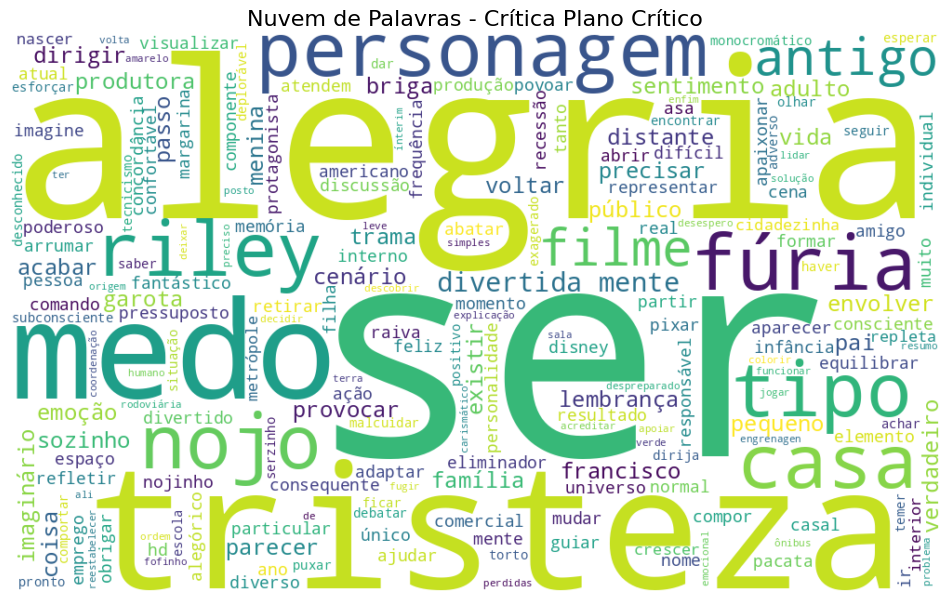

In [ ]:

# ============================================================
#  GERAÇÃO DA NUVEM DE PALAVRAS
# ============================================================
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Juntar todos os tokens lematizados em uma string só
texto_final = " ".join(tokens_lematizados)

# Gerar nuvem de palavras
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(texto_final)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.title("Nuvem de Palavras - Crítica AdoroCinema", fontsize=16)
#plt.title("Nuvem de Palavras - Crítica Omelete", fontsize=16)
plt.title("Nuvem de Palavras - Crítica Plano Crítico", fontsize=16)

plt.show()


In [ ]:
# ============================================================
#  EXPORTAR RESULTADO PARA CSV
# ============================================================
import pandas as pd

# Montar DataFrame com resultados
df_tokens = pd.DataFrame({
    #"fonte": ["AdoroCinema"],
    #"fonte": ["Omelete"],
    "fonte": ["PlanoCritico"],
    "texto_original": [texto],
    "tokens_filtrados": [" ".join(tokens_filtrados)],
    "tokens_lematizados": [" ".join(tokens_lematizados)]
})
df_tokens.head()


,fonte,texto_original,tokens_filtrados,tokens_lematizados
0,PlanoCritico,Riley é uma menina de 11 anos que é retirada d...,riley menina anos retirada vida americano pai ...,riley menina ano retirar vida americano pai ar...


In [ ]:
# Caminho onde o arquivo será salvo (pode mudar conforme seu Drive)
#caminho_saida = "/content/drive/MyDrive/Colab_Notebooks/PLN/adorocinema_processado.csv"
#caminho_saida = "/content/drive/MyDrive/Colab_Notebooks/PLN/omelete_processado.csv"
caminho_saida = "/content/drive/MyDrive/Colab_Notebooks/PLN/plano_critico_processado.csv"
df_tokens.to_csv(caminho_saida, index=False, encoding="utf-8")

print(f"✅ Arquivo CSV salvo com sucesso em:\n{caminho_saida}")
print("Colunas:", list(df_tokens.columns))


✅ Arquivo CSV salvo com sucesso em:
/content/drive/MyDrive/Colab_Notebooks/PLN/plano_critico_processado.csv
Colunas: ['fonte', 'texto_original', 'tokens_filtrados', 'tokens_lematizados']
